# Indicador de Rendimiento de estudiantes

## Ciclo de vida
- Comprender el problema
- Recopilación de datos
- Comprobación de datos
- Análisis exploratorio de datos
- Pre-procesamiento de datos
- Entrenamiento del modelo de ML
- Escogiendo el mejor modelo

## 1) Comprensión del problema
- Este proyecto busca entender cómo el desempeño de estudiantes (test scores) es afectado por variables como nivel de educación de los padres, etnicidad, género, alimentación y preparación para exámenes.

## 2) Recopilación de datos
- Fuente: [Link](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- La data contiene 8 columnas y 1000 filas

### 2.1) Importación de datos e instalación de paquetes
Importando Pandas, Numpy, Matplotlib, Seaborn y librerías de advertencias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importando la data .csv como un dataframe de pandas

In [3]:
df = pd.read_csv('data.csv')

In [4]:
# Mostrando los 5 primeros
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Tamaño del dataset
df.shape

(1000, 8)

### 2.2) Información del dataset
- gender: sexo del estudiante (Male/Female)
- race/ethnicity: Etnicidad del estudiante (Group A, B, C, D, E)
- parental level of education: Educación de los padres (Cahelor's degree, collge, master's degree, associate's degree, high school)
- lunch: Comida (standard, free/reduced)
- test preparation course: completado o no completado antes del test
- math score
- reading score
- writing score

## 3) Comprobaciones a realizar
- Missing values
- Duplicados
- Tipo de datos
- Número de valores únicos por cada columna
- Estadísticas
- Categorías presentes en las diferentes columnas categóricas

### 3.1) Valores Faltantes

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No hay missing values

### 3.2) Verificación de Duplicados

In [7]:
df.duplicated().sum()

# No hay valores duplicados en el df

0

### 3.3) Verificación de data types

In [8]:
# Verificación de null y data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Verificando el número de valores únicos de cada columna


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5) Estadística del dataset

In [10]:
# Estadísticas de variables numéricas 
df.describe() 

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- Los valores medios (mean) de las tres variables numéricas son cercanas entre sí, entre 66.08 y 68.05
- Los valores de desviación estandar (std) son cercanas entre sí, entre 14.6 y 15.19
- Un valor a revisar sería el mínimo en math score, el cual es de cero

### 3.7) Exploring Data

In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
# Variables categóricas - Categorical features 
print('Categorías en variable gender: ', end='')
print(df['gender'].unique())

print('Categorías en race_ethnicity:', end='')
print(df['race_ethnicity'].unique())

print('Categorías en parental_level_of_education: ', end='')
print(df['parental_level_of_education'].unique())

print('Categorías en lunch: ', end='')
print(df['lunch'].unique())

print('Categorías en test_preparation_course: ', end='')
print(df['test_preparation_course'].unique())

Categorías en variable gender: ['female' 'male']
Categorías en race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
Categorías en parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorías en lunch: ['standard' 'free/reduced']
Categorías en test_preparation_course: ['none' 'completed']


In [13]:
 # Definir columnas numéricas y categóricas 
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print ('Tenemos {} variables numéricas: {}'.format(len(num_features), num_features))
print('Tenemos {} variables categóricas: {}'.format(len(cat_features), cat_features))

Tenemos 3 variables numéricas: ['math_score', 'reading_score', 'writing_score']
Tenemos 5 variables categóricas: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8) Agregando columnas para "total score" y "avarege"
 Debido a la naturaleza de nuestro problema sumaremos los tres notas (variables numéricas) y le llamaré "total score", el cual será mi función de salida. Adicionalmente crearé una columna denominada promedio. Basado en estas dos columnas crearé dos modelos para predecir cada una de ellas, pasando a ser mis variables independientes. Una vez  realizado no pasaré a eliminar directamente las tres variables numéricas pues averiguaré más sobre ellas.

In [14]:
# Definición de total_score y average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Número de estudiantes con la máxima nota en math: {math_full}')
print(f'Número de estudiantes con la máxima nota en writing: {writing_full}')
print(f'Número de estudiantes con la máxima nota en reading: {reading_full}')

Número de estudiantes con la máxima nota en math: 7
Número de estudiantes con la máxima nota en writing: 14
Número de estudiantes con la máxima nota en reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Número de estudiantes con nota menor a 20 en math: {math_less_20}')
print(f'Número de estudiantes con nota menor a 20 en writing: {writing_less_20}')
print(f'Número de estudiantes con nota menor a 20 en reading: {reading_less_20}')

Número de estudiantes con nota menor a 20 en math: 4
Número de estudiantes con nota menor a 20 en writing: 3
Número de estudiantes con nota menor a 20 en reading: 1


Insights
- La mayor cantidad de mejores notas está en la prueba de reading (best performance)
- La mayor cantidad de peores notas se encuentra en la prueba de math

## 4) Exploración de datos


### 4.1) Visualizando la distribución average_score
- Histograma
- Kernel Distribution Function (KDE)



4.1.1) Histograma y KDE

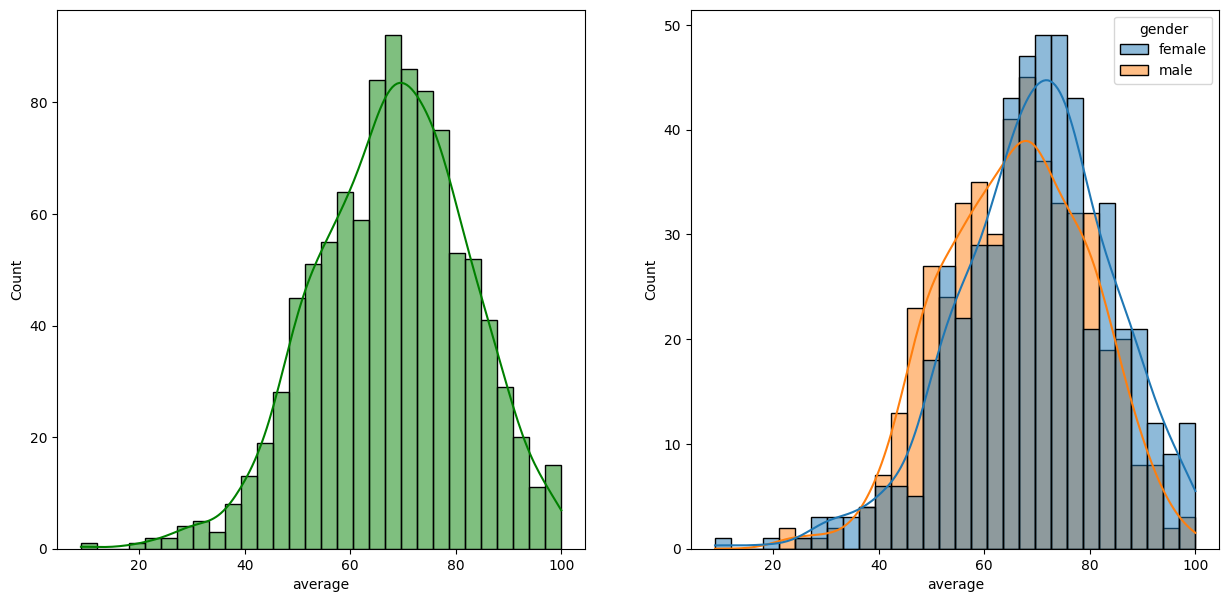

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

# Primer subplot: KDE general
plt.subplot(121)
plot_1 = sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

# Segundo subplot: KDE por género
plt.subplot(122)
plot2 = sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

plt.show()

In [34]:
kde_line1 = plot_1.get_lines()[0]  # La línea KDE generada automáticamente
y_data1 = kde_line1.get_data()[1]  # Accede a los valores del eje Y (densidad)
max_kde1 = y_data1.max()
print(f"Máximo de la campana verde (general): {max_kde1}")

kde_lines = plot2.get_lines()  # Devuelve una lista de líneas (una por cada género)
max_kdes = [line.get_data()[1].max() for line in kde_lines]  # Extrae el máximo de cada curva

print(f"Máximo de la campana naranja masculino (KDE 1): {max_kdes[0]}")
print(f"Máximo de la campana azul femenino (KDE 2): {max_kdes[1]}")

# .get_lines() devuelve todas las líneas dibujadas
# .get_data() Devuelve una tupla de dos arrays: [0] valores del eje X (promedios), [1] valores del eje Y (la densidad)
# line.get_data()[1] Extrae solo los valores del eje Y
# .max() calcula el valor máximo


Máximo de la campana verde (general): 83.48923977732574
Máximo de la campana naranja masculino (KDE 1): 38.92467091577191
Máximo de la campana azul femenino (KDE 2): 44.72342672632476


In [36]:
# Itera sobre cada línea KDE
for i, line in enumerate(kde_lines):
    x_data, y_data = line.get_data()  # x: valores de average, y: densidad KDE
    max_index = np.argmax(y_data)     # Índice del valor máximo en y
    max_x = x_data[max_index]         # Valor de average donde ocurre el pico
    max_y = y_data[max_index]         # Altura del pico

    print(f"Curva KDE {i+1}: máximo count = {max_y:.4f}, valor en average = {max_x:.2f}")

# KDE 2: Femenino
# KDE 1: Masculino

Curva KDE 1: máximo count = 38.9247, valor en average = 67.99
Curva KDE 2: máximo count = 44.7234, valor en average = 71.65


Insights
-  Estudiantes mujeres tienden a tener mejores notas que varones

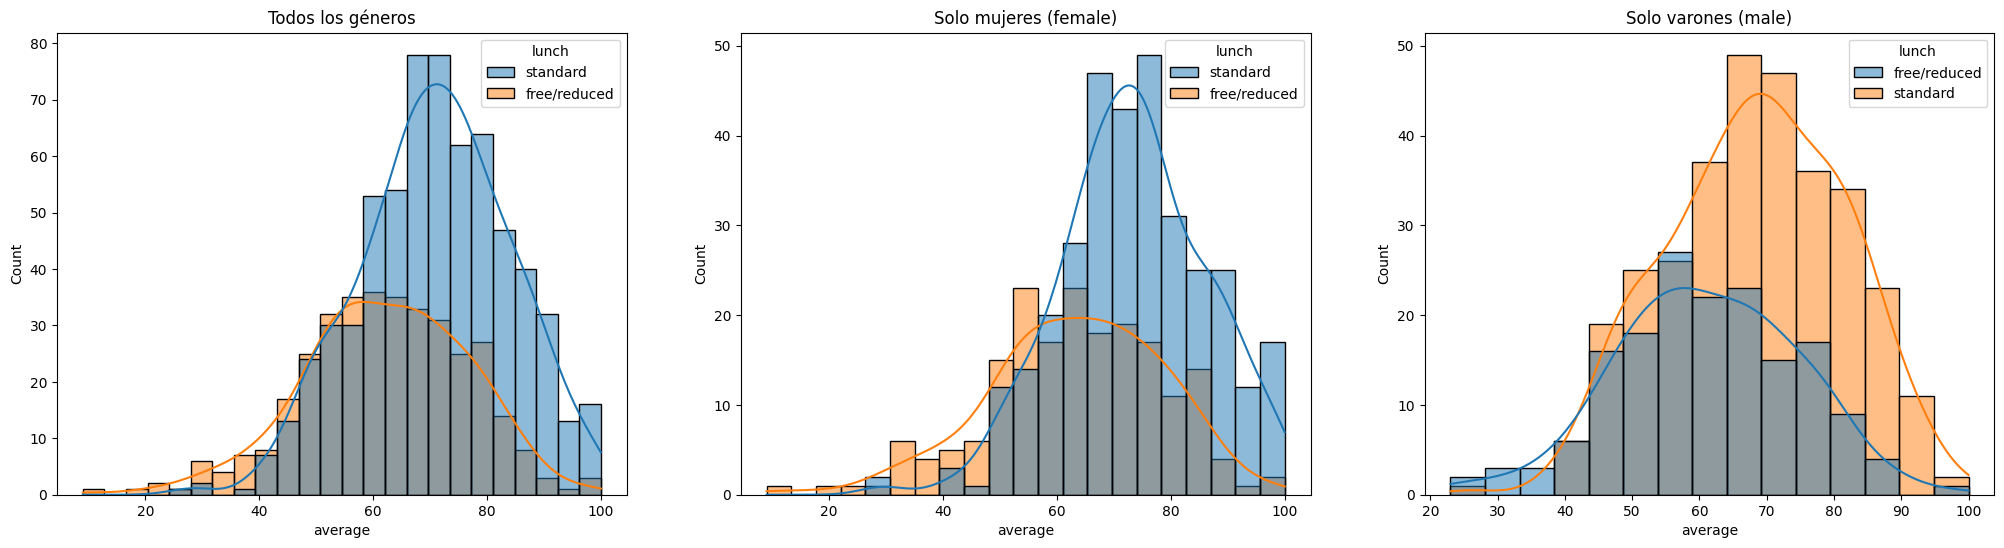

In [53]:
fig, axs = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('Todos los géneros')

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Solo mujeres (female)')

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Solo varones (male)')

plt.show()

Insights
- Aparentemente una comida estándar (no reducida/gratuita) ayuda a sacar mejores notas

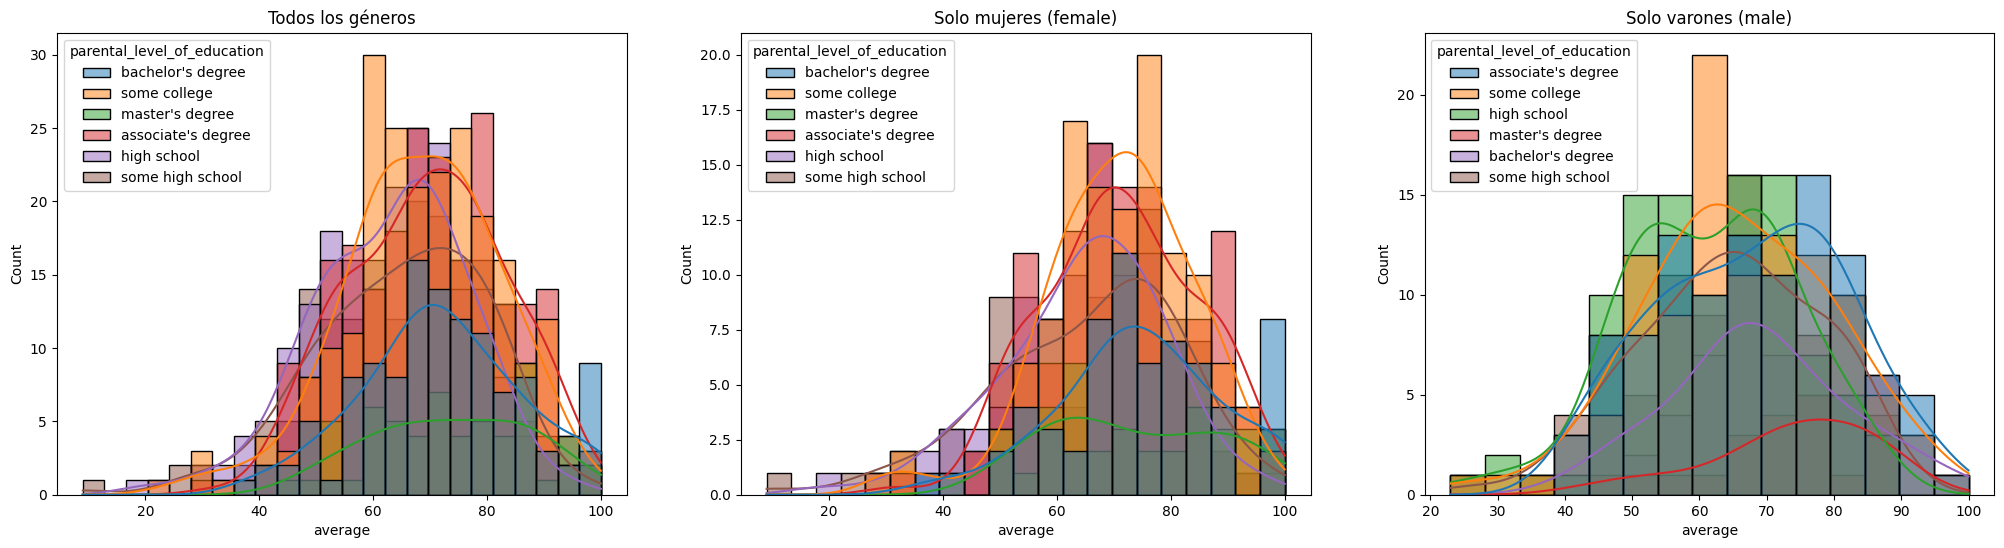

In [58]:
fig, axs = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])
axs[0].set_title('Todos los géneros')

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Solo mujeres (female)')

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('Solo varones (male)')

plt.show()

En general no se puede comentar mucho sobre la relación entre parental_level_of_education y el performance de losl estudiantes. A lo más se ve una tendencia que hijos varones cuyos padres poseen master degree sacan mejores notas.

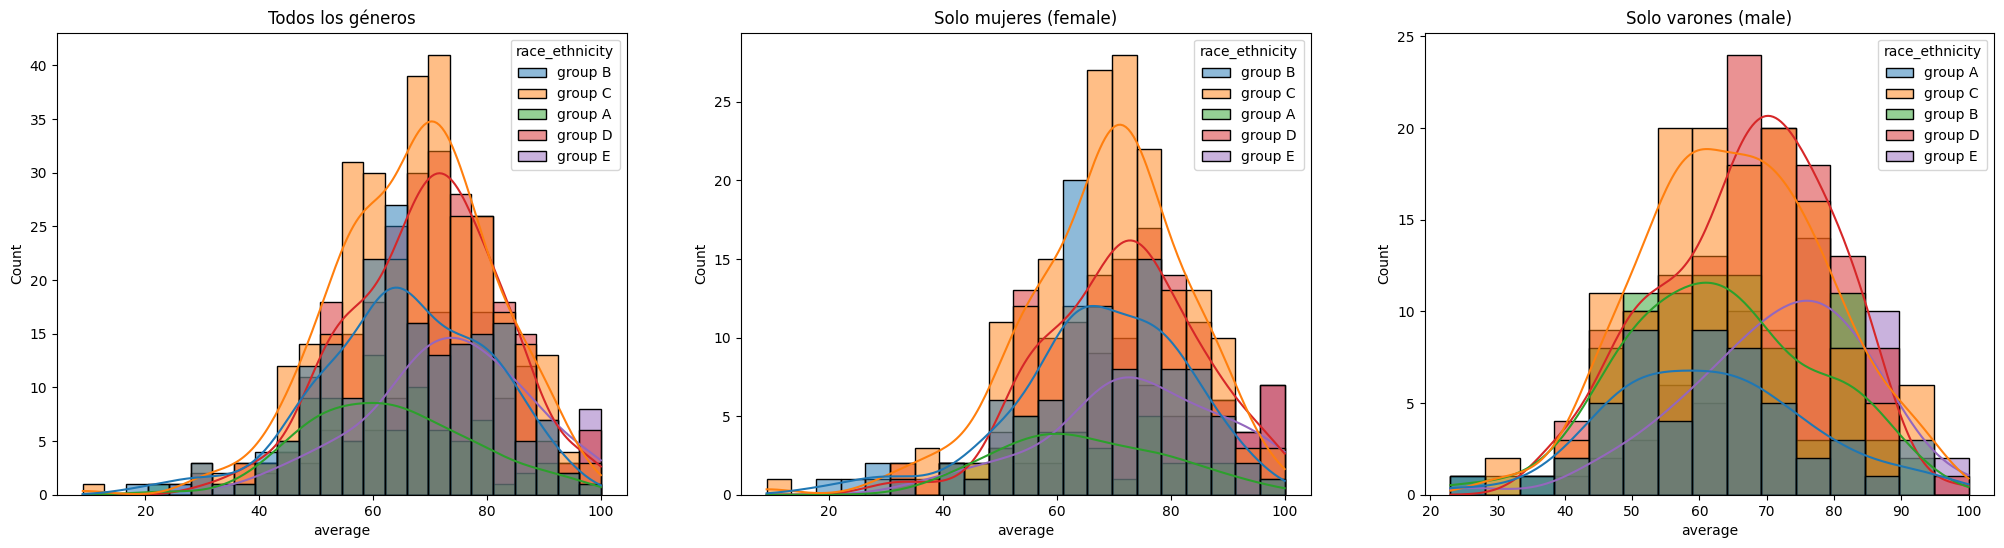

In [62]:
fig, axs = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])
axs[0].set_title('Todos los géneros')

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Solo mujeres (female)')

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity', ax=axs[2])
axs[2].set_title('Solo varones (male)')

plt.show()

Insights
- Estudiantes del grupo A, sin importar si son hombres o mujeres, tienen a tener un bajo rendimiento en exámenes

### 4.2) Variable Género

- ¿Cómo es la distribución de esta variable?
- Esta variable tiene imapacto sobre nuestra variable objetivo?

4.2.1) Análisis Univariado
Distribución de géneros

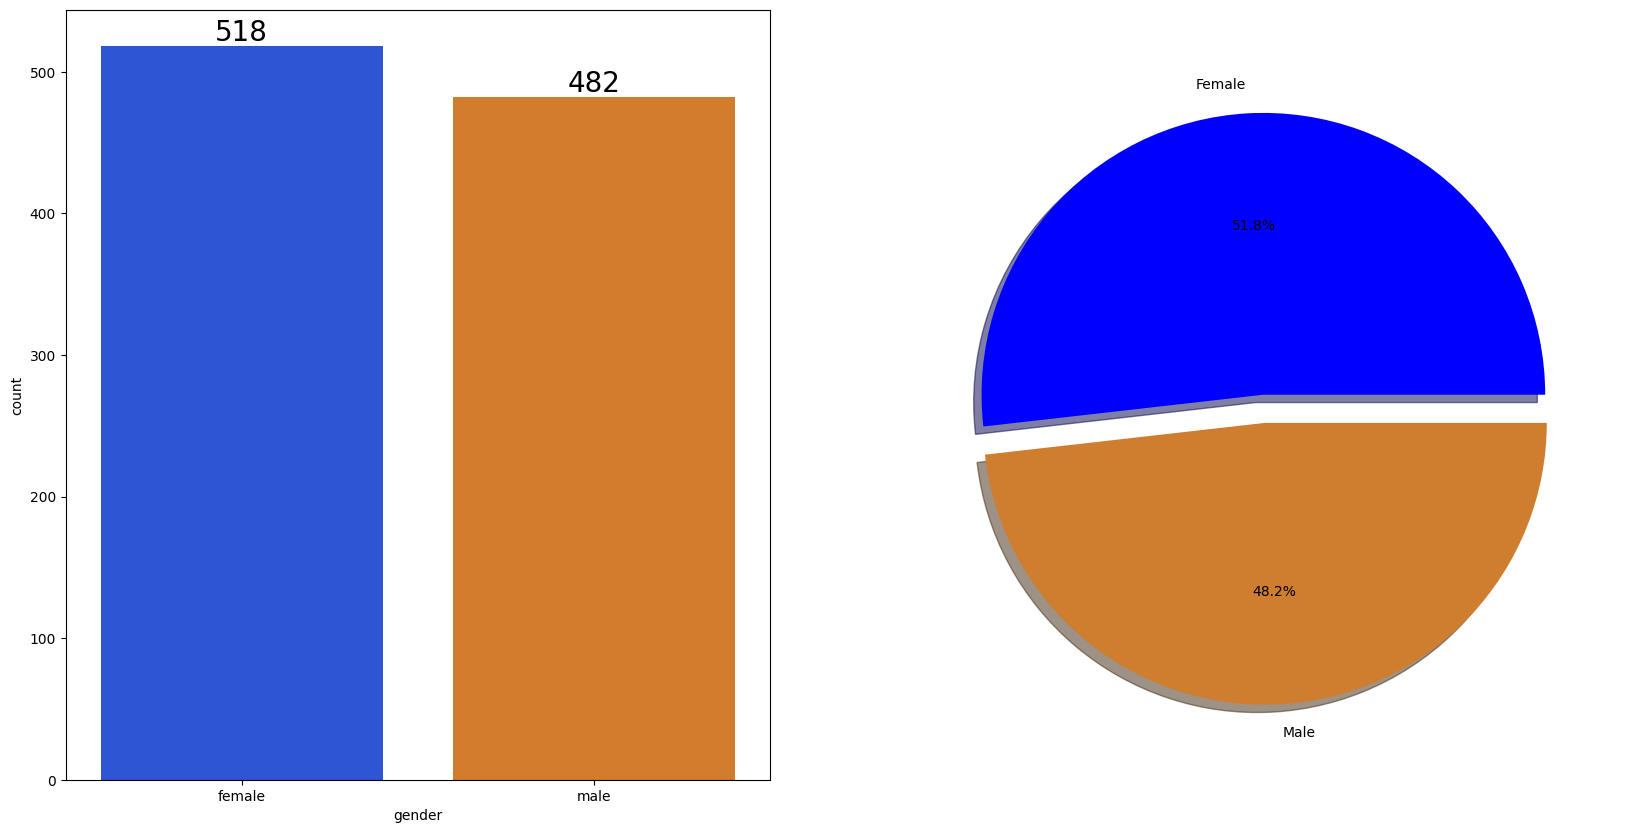

In [120]:
# Crea una figura con 2 subplots (1 fila, 2 columnas)
f,ax=plt.subplots(1,2,figsize=(20,10))

# gráfico de barras
sns.countplot(x=df['gender'], # Variable categórica para el conteo
              data=df, # data
              palette ='bright', # Paleta de colores
              ax=ax[0],  # Dibuja el gráfico en el primer subplot
              saturation=0.65) # intensidad del color
# etiquetas numéricas encima de cada barra:
for container in ax[0].containers: # Itera sobre los contenedores de barras
    ax[0].bar_label(container, 
                    color='black', # Color del texto
                    size=20)  # Tamaño de fuente

# Gráfico de pastel que muestra la proporción de géneros:
plt.pie(x=df['gender'].value_counts(),  # Cuenta cuántos registros hay por género
        labels=['Female','Male'], # Etiquetas para cada porción
        explode=[0,0.1], # Separa ligeramente la porción de 'Male' para destacarla
        autopct='%1.1f%%', # Muestra el porcentaje con un decimal
        shadow=True, #sombra
        colors=['blue',"#ce7e2e"]) # Colores
plt.show()

4.2.2) Análisis Bivariado

In [121]:
df.select_dtypes(include='number').columns

Index(['math_score', 'reading_score', 'writing_score', 'total_score',
       'average'],
      dtype='object')

In [122]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


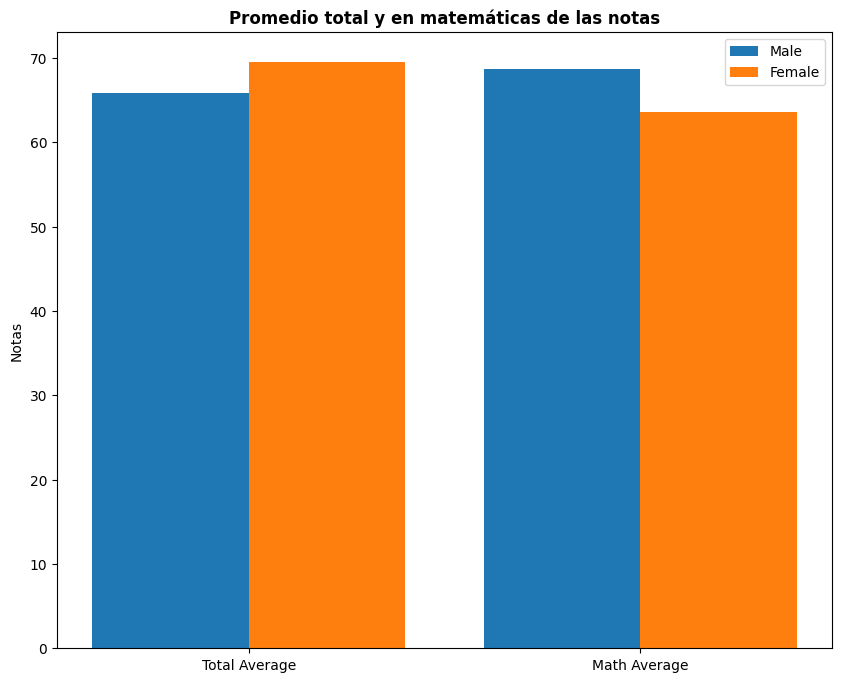

In [123]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis -0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Notas")
plt.title("Promedio total y en matemáticas de las notas", fontweight='bold')
plt.legend()
plt.show()

Insights
- Los varones tienen un promedio ligeramente mayor en matemática que las mujeres.
- Las mujeres presentan un promedio total mayor que el de los hombres

### 4.3) Columna  race_ethnicity
- ¿Cómo es la distribución de esta variable?
- ¿la variable race_ethnicity tiene impacto en el performance de los estudiantes?

4.3.1) Análisis univariado

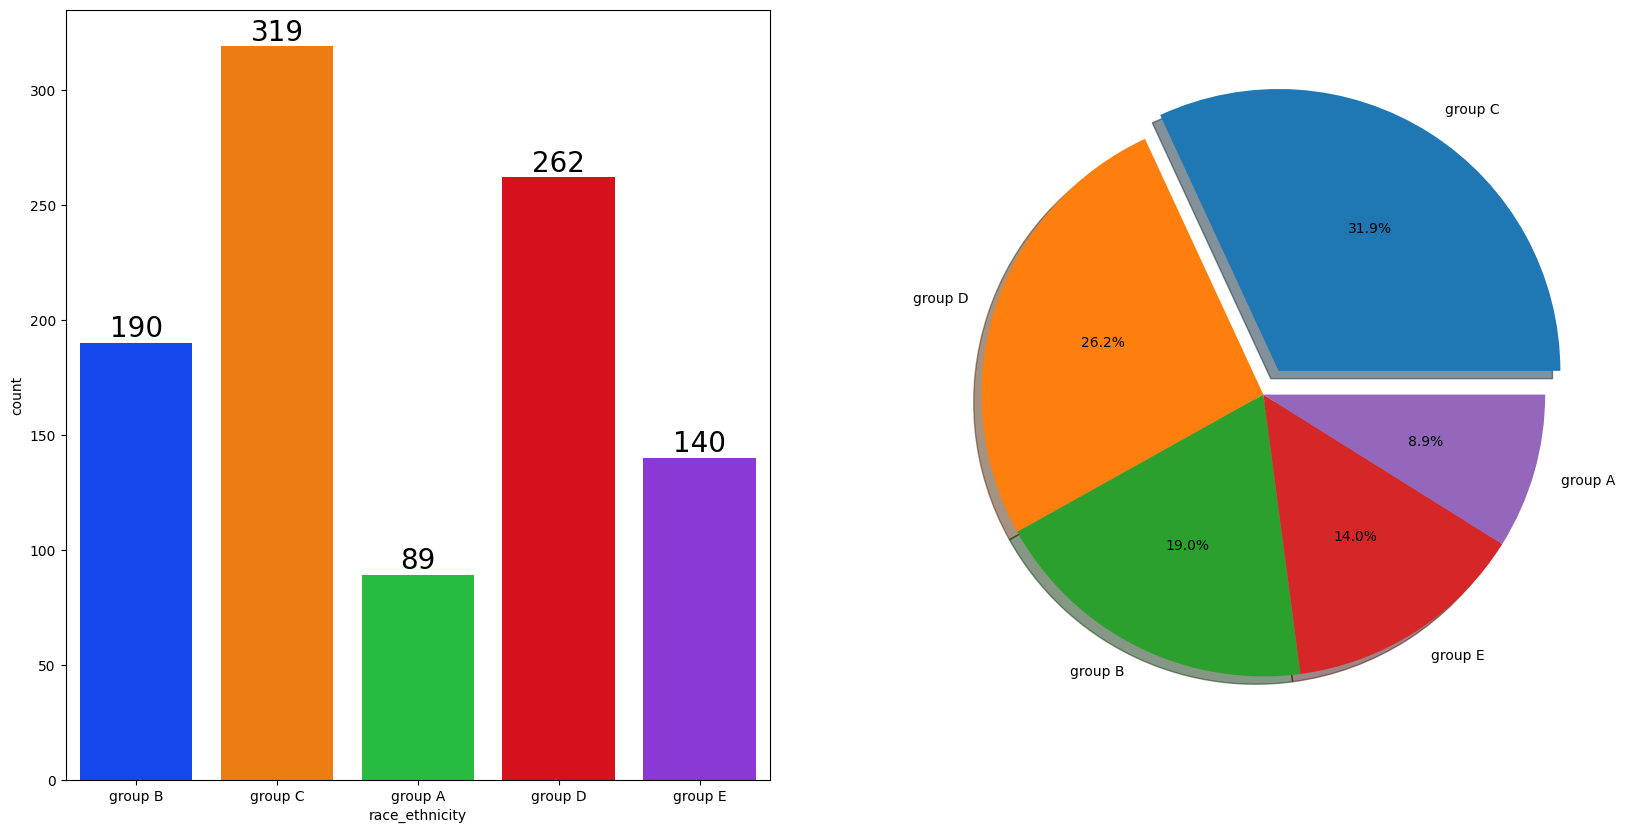

In [94]:
f,ax=plt.subplots(1,2,figsize=(20,10))

#Gráfico de barras
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.85)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

# Gráfico tipo pastel
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insigths
- El grupo A tiene la menor cantidad de estudiantes.
- El grupo C y D tienen la mayor cantidad de estudiantes.

4.3.2) Análisis Bivariado

In [ ]:
# Agrupa el DataFrame por la variable 'race_ethnicity'
Group_data2 = df.groupby('race_ethnicity')

In [112]:
df.groupby('race_ethnicity').agg({'math_score': 'mean', 
                                  'reading_score': 'mean', 
                                  'writing_score': 'mean'})


,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [113]:
race_group = df.groupby('race_ethnicity')[df.select_dtypes(include='number').columns].mean()
race_group

,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


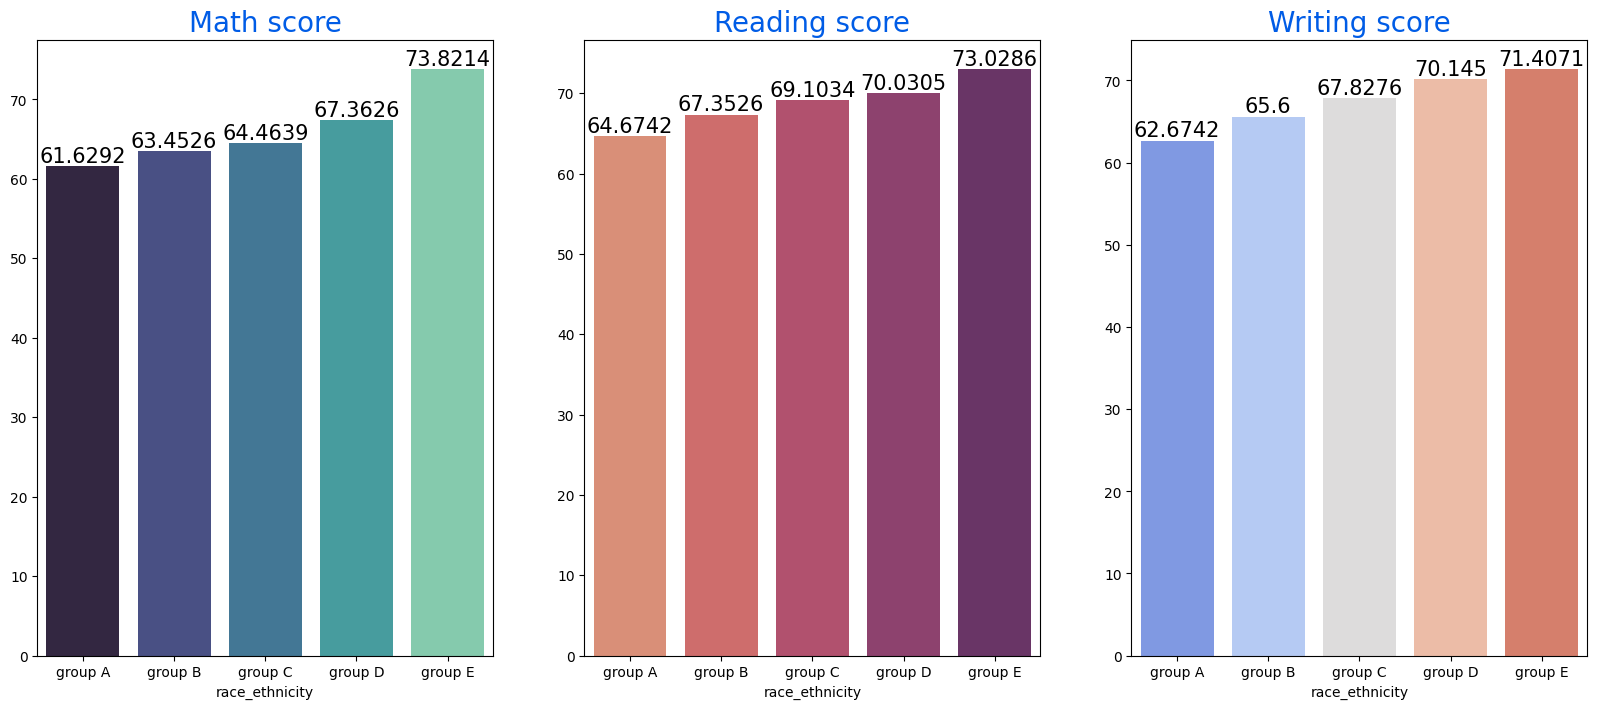

In [95]:
# figura con 3 subplots en una fila
f,ax=plt.subplots(1,3,figsize=(20,8))

# Primer gráfico: promedio de puntajes en matemáticas por grupo étnico
sns.barplot(x=Group_data2['math_score'].mean().index, # Categorías
            y=Group_data2['math_score'].mean().values, # Valores promedio
            palette = 'mako',  # Paleta de colores
            ax=ax[0])  # Dibuja en el primer subplot
ax[0].set_title('Math score',color='#005ce6',size=20)
# etiquetas numéricas encima de cada barra:
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

#######################################################

# Segundo gráfico: promedio de puntajes en lectura por grupo étnico
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

#########################################################

# Tercer gráfico: promedio de puntajes en escritura por grupo étnico
sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
- Grupo E tiene las mayores notas en las tres evaluaciones
- El grupo A tiene las peores notas en las tres evaluaciones.

### 4.4) Variable parental_level_of_education
- ¿Cuál es el nivel de educación de parientes?
- ¿Esta variable tiene impacto en la variable objetivo?

4.4.1) Análisis univariado

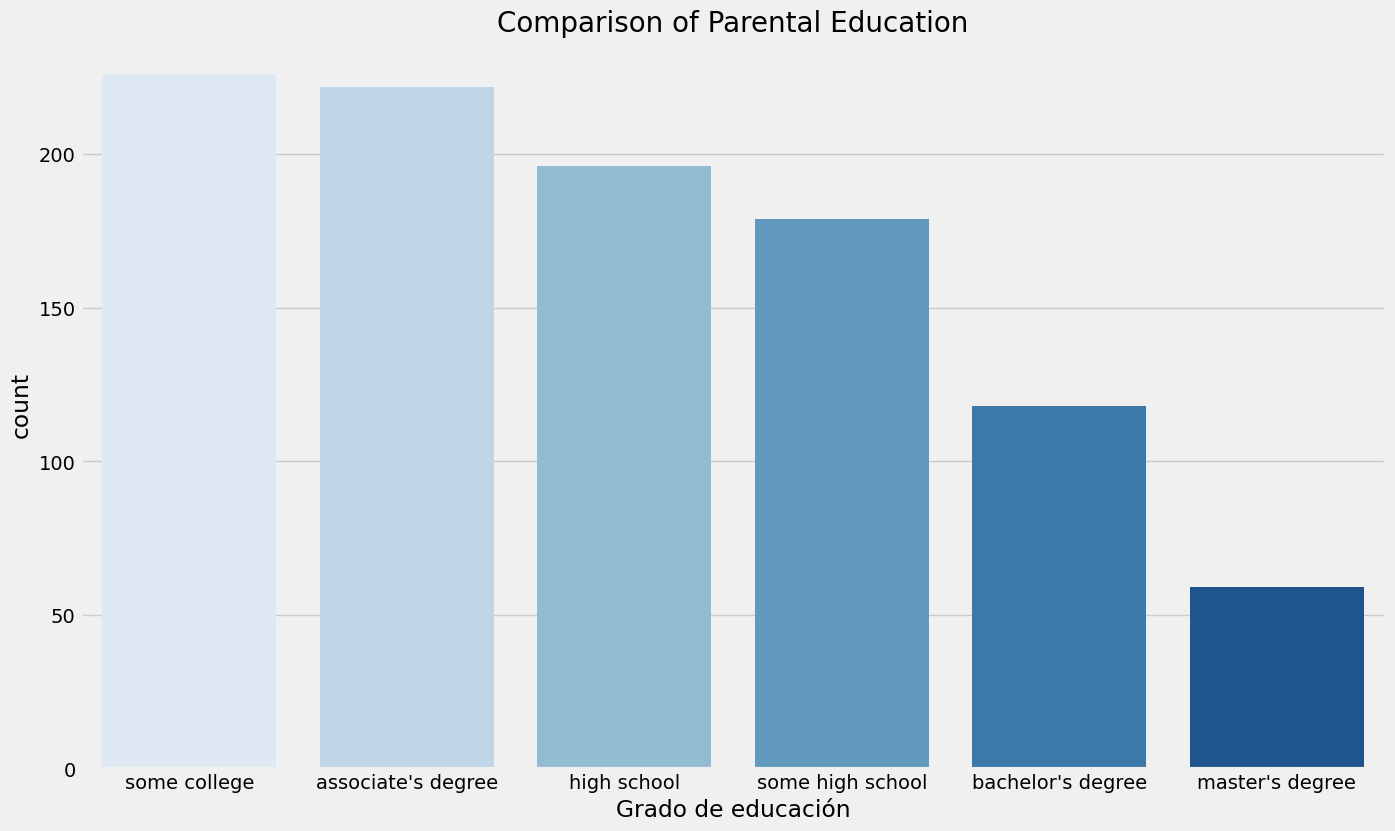

In [131]:
# Establece el tamaño de todas las figuras 
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight') # Aplica el estilo visual

# gráfico de barras 
sns.countplot(data=df, x='parental_level_of_education', palette = 'Blues',  order=df['parental_level_of_education'].value_counts().index)  

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)  # título al gráfico
plt.xlabel('Grado de educación')
plt.ylabel('count')

plt.show()

4.4.2) Análisis Bivariado

In [136]:
parental_edu_group = df.groupby('parental_level_of_education')[df.select_dtypes(include='number').columns].mean()
parental_edu_group

,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


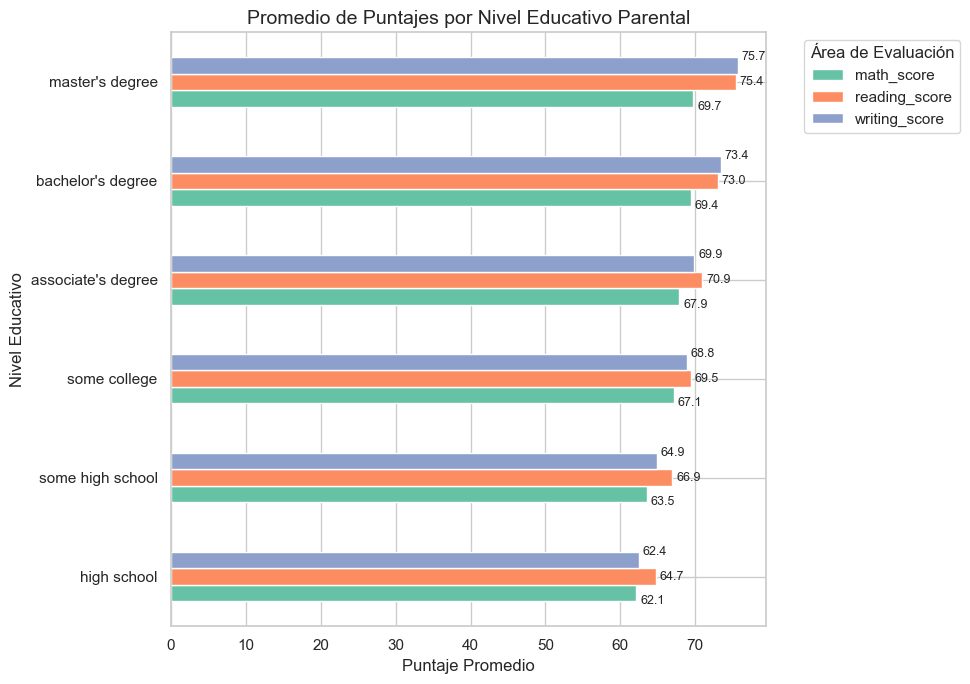

In [148]:
# Agrupamos y calculamos el promedio
parental_edu_group= df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
# Ordenamos por promedio total
parental_edu_group['total_avg'] = parental_edu_group.mean(axis=1)
parental_edu_group_sorted = parental_edu_group.sort_values('total_avg', ascending=True).drop(columns='total_avg')

# Estilo de Seaborn
sns.set_theme(style="whitegrid")

# Creamos el gráfico
ax = parental_edu_group_sorted.plot(kind='barh', figsize=(10, 7), color=sns.color_palette("Set2"))

# Añadimos etiquetas de valor en cada barra
for i, col in enumerate(parental_edu_group_sorted.columns):
    for y, x in enumerate(parental_edu_group_sorted[col]):
        ax.text(x + 0.5, y + (i - 1) * 0.25, f'{x:.1f}', va='center', fontsize=9)

# Ajustes estéticos
plt.title('Promedio de Puntajes por Nivel Educativo Parental', fontsize=14)
plt.xlabel('Puntaje Promedio')
plt.ylabel('Nivel Educativo')
plt.legend(title='Área de Evaluación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


Insights
- Por el orden de estos podemos ver que aquellos alumnos con parientes con grado de bachiller o maestría tienen notas más altas en cada una de las pruebas

### 4.5) Variable "Lunch"
- ¿Qué tipo de comida es más común entre los estudiantes?
- ¿se relaciona con el la variable objetivo?

4.5.1) Análisis univariado

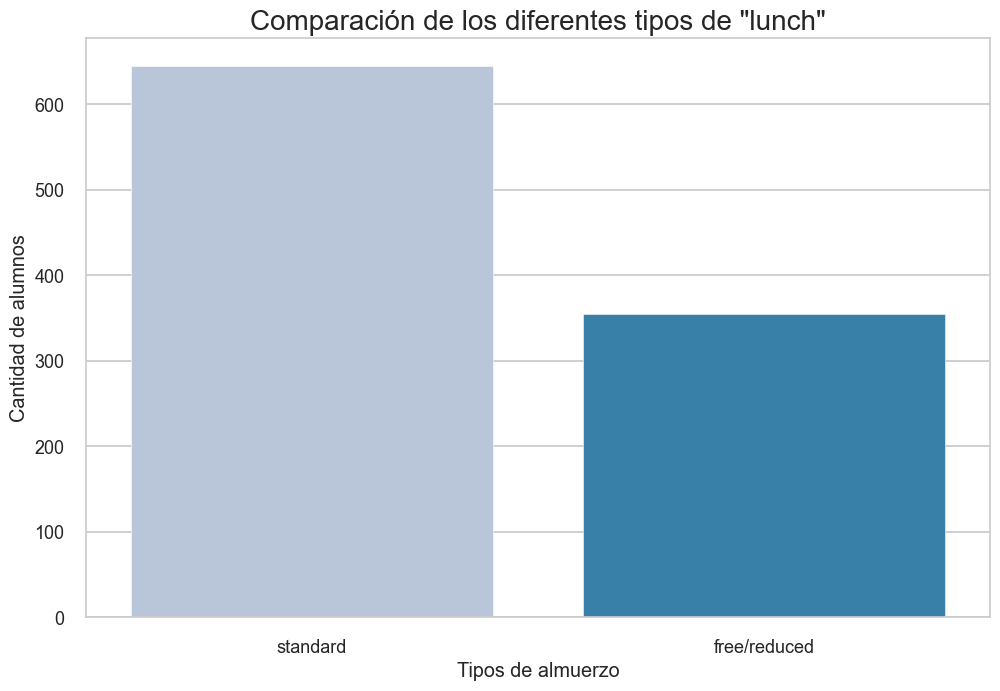

In [152]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data=df, x='lunch', palette = 'PuBu')

plt.title('Comparación de los diferentes tipos de "lunch"', fontweight = 30, fontsize = 20)
plt.xlabel('Tipos de almuerzo')
plt.ylabel('Cantidad de alumnos')

plt.show()

4.5.2) Análisis Bivariado

In [157]:
# Agrupamos y calculamos el promedio
lunch_group= df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean()
lunch_group

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [158]:
# Ordenamos por promedio total
lunch_group['total_avg'] = lunch_group.mean(axis=1)
lunch_group_sorted = lunch_group.sort_values('total_avg', ascending=True).drop(columns='total_avg')
lunch_group_sorted

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


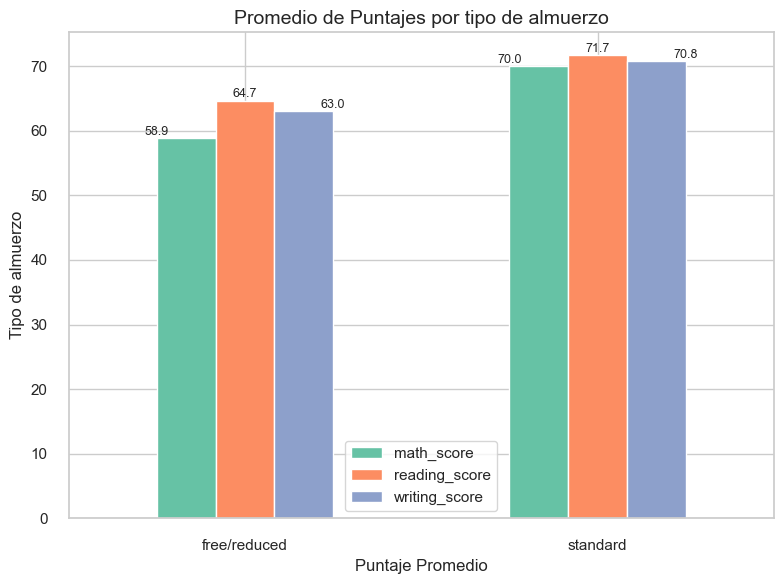

In [176]:
# Estilo de Seaborn
sns.set_theme(style="whitegrid")

# Creamos el gráfico
ax = lunch_group_sorted.plot(kind='bar', figsize=(8, 6), color=sns.color_palette("Set2"))

# Añadimos etiquetas de valor en cada barra
for i, col in enumerate(lunch_group_sorted.columns):
    for x, y in enumerate(lunch_group_sorted[col]):
        ax.text(x + (i - 1) * 0.25, y + 0.5, f'{y:.1f}', ha='center', fontsize=9)

# Ajustes estéticos
plt.title('Promedio de Puntajes por tipo de almuerzo', fontsize=14)
plt.xlabel('Puntaje Promedio')
plt.ylabel('Tipo de almuerzo')
#plt.legend(title='Área de Evaluación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Insights
- Estudiantes que tienen una comida "standar" tiene mejores notas en cada prueba que los estudiantes con comida "free/reducida"

### 4.6) Outliers


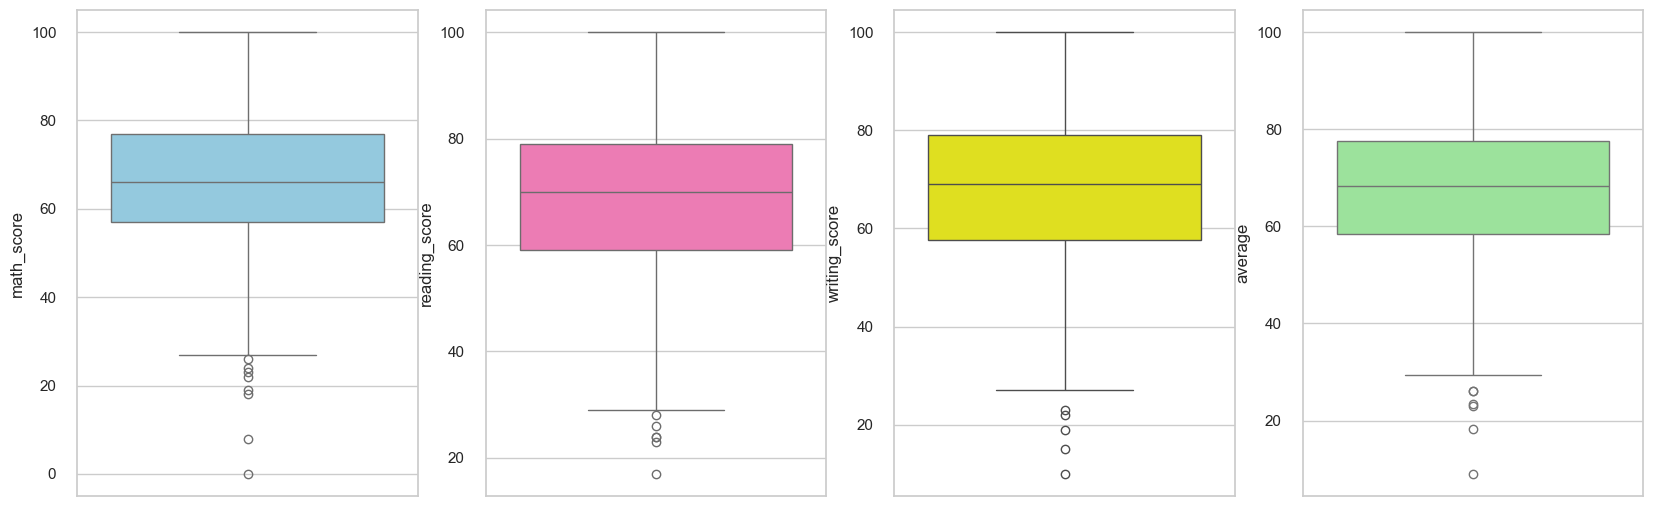

In [180]:
plt.subplots(1,4,figsize=(18,6))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.7) Análisis Multivariado

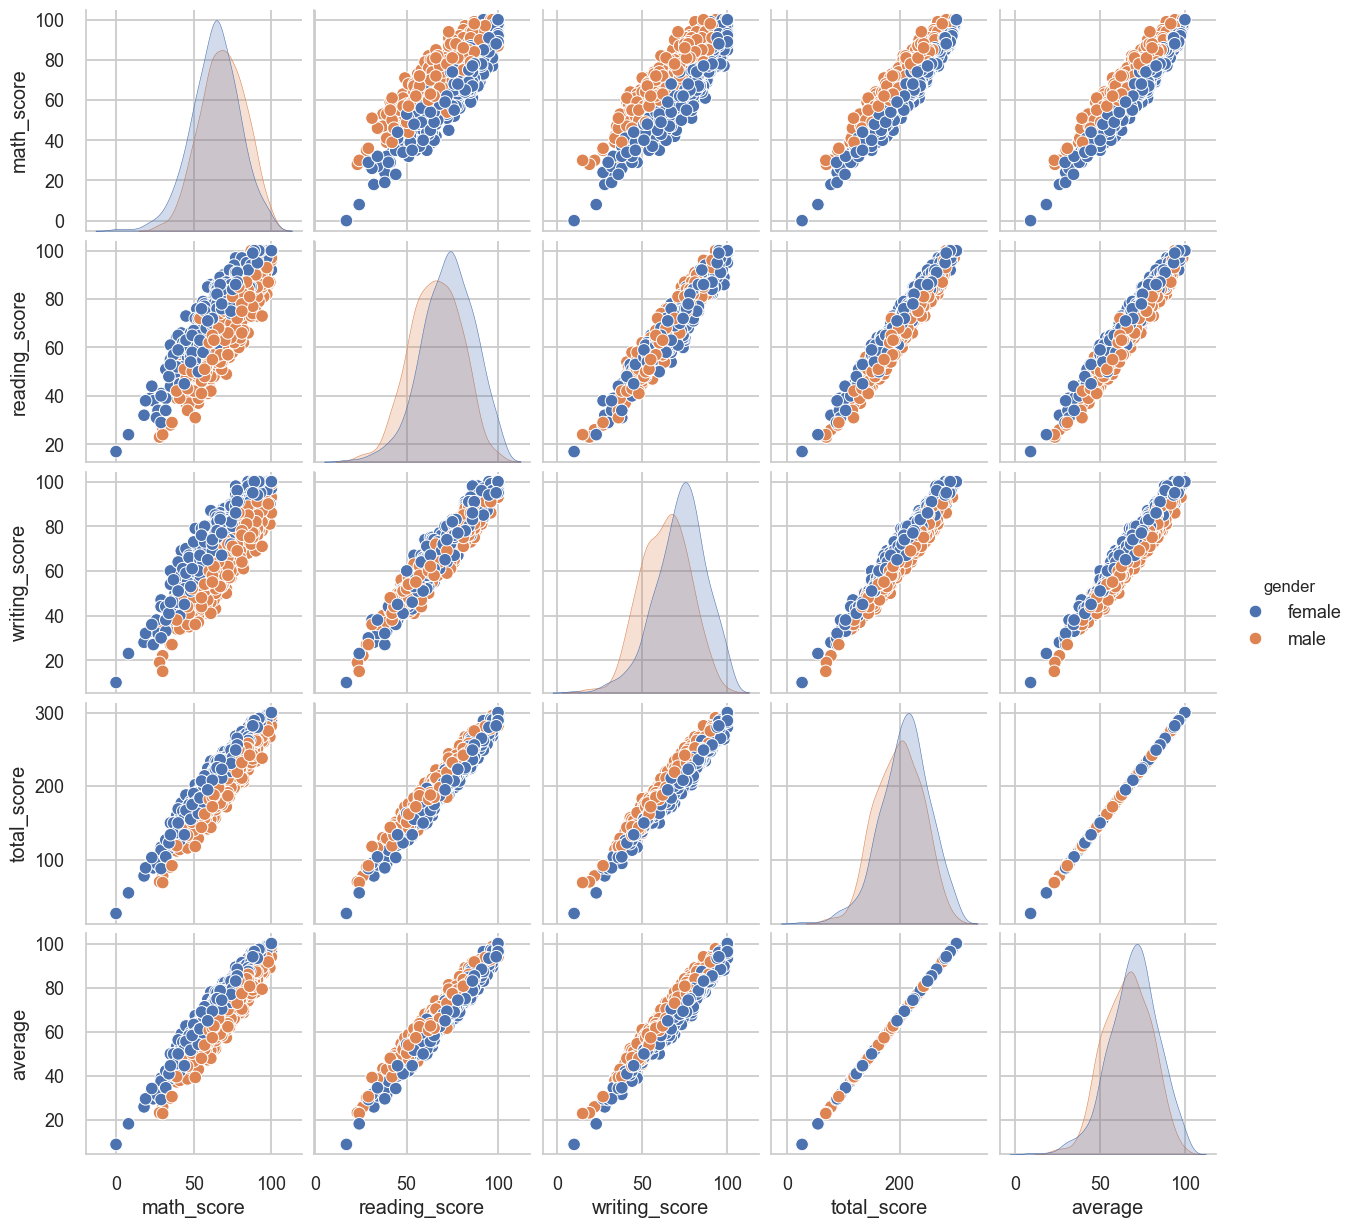

In [155]:
sns.pairplot(df,hue = 'gender')
plt.show()

## 5) Conclusiones
- El rendimiento de los estudiantes podría estar relacionado con las variables 'lunch', 'parental_education_level' y 'ethnicity'
- Mujeres tienen mejor rendimiento en los exámenes que los varones